In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import numpy as np

In [45]:
root = Path.cwd().parent

five_fold_results_dir = root / "RESULTS_fiveFold" / "results"
five_fold_aggregated_csv = five_fold_results_dir / "results5Fold_summary_combined.csv" 

df = pd.read_csv(five_fold_aggregated_csv)

C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_17648\394263235.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['Group'] = 'Variance Threshold >0.01'
C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_17648\394263235.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['Group'] = 'All Features'


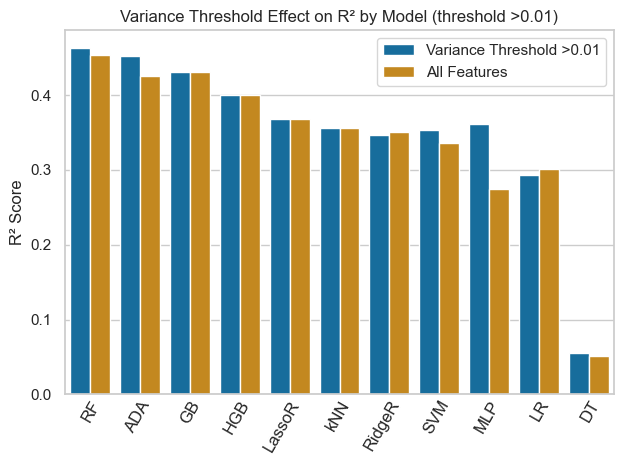

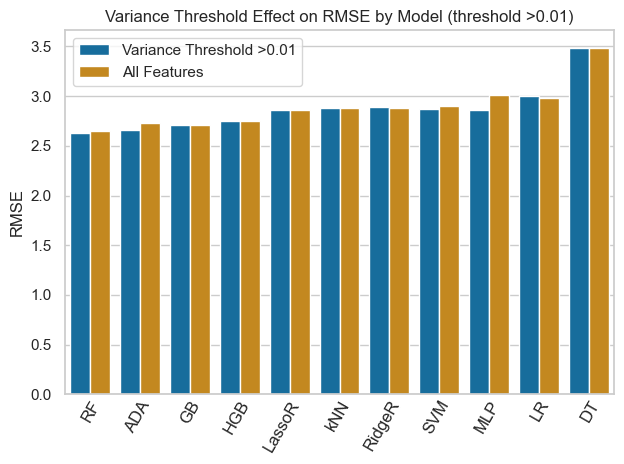

In [46]:
# Visulizing Effect of Applying Variance Threshold
# Set style
sns.set(style="whitegrid")
palette_r2 = 'colorblind'
palette_rmse = 'colorblind'

# Filter Group 1: lowVarianceDrop = TRUE
group1 = df[df['lowVarianceDrop'] == True]

# Filter Group 2: lowVarianceDrop = FALSE AND rfecv, kbest, autospearman = FALSE
group2 = df[
    (df['lowVarianceDrop'] == False) &
    (df['rfecv'] == False) &
    (df['kbest'] == False) &
    (df['autospearman'] == False) &
    (df['hyperparameters'] == False) &
    (df['dropExecTime'] == False)
]

group1['Group'] = 'Variance Threshold >0.01'
group2['Group'] = 'All Features'

combined = pd.concat([group1, group2], ignore_index=True)

model_order = (
combined.groupby("model_name")["r2_mean"]
.mean()
.sort_values(ascending=False)
.index.tolist()
)

# --- R² Plot ---
# plt.figure(figsize=(6.4, 4.8))
sns.barplot(data=combined, x="model_name", y="r2_mean", hue="Group", order=model_order, palette=palette_r2)
plt.ylabel("R² Score")
plt.xlabel(None)
plt.title("Variance Threshold Effect on R² by Model (threshold >0.01)")
plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)
plt.tight_layout()
plt.legend(title=None)
# plt.savefig(os.path.join(plots_path, 'r2_by_model.pdf'), format='pdf', bbox_inches='tight')
plt.show()

# --- RMSE Plot ---
# plt.figure(figsize=(6.4, 4.8))
sns.barplot(data=combined, x="model_name", y="rmse_mean", hue="Group", order=model_order, palette=palette_rmse)
plt.ylabel("RMSE")
plt.xlabel(None)
plt.title("Variance Threshold Effect on RMSE by Model (threshold >0.01)")
plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)
plt.tight_layout()
plt.legend(title=None)
# plt.savefig(os.path.join(plots_path, 'rmse_by_model.pdf'), format='pdf', bbox_inches='tight')
plt.show()


C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_17648\439127707.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['Group'] = 'without Execution Time'
C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_17648\439127707.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['Group'] = 'with Execution Time'


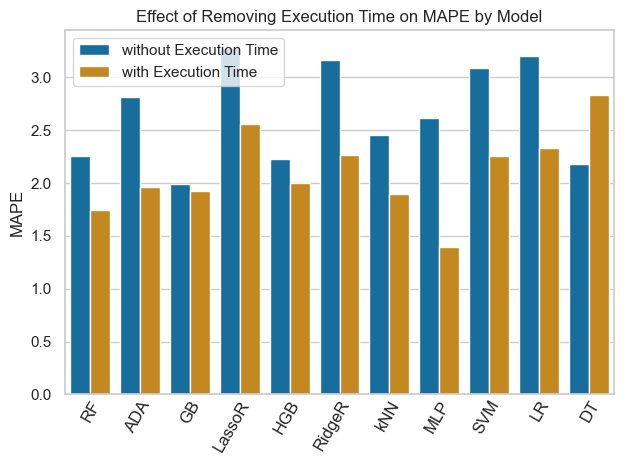

In [47]:
# Set style
sns.set(style="whitegrid")
palette_r2 = 'colorblind'
palette_rmse = 'colorblind'

# Filter Group 1: with dropExecTime = True
group1 = df[df['dropExecTime'] == True]


# Filter Group 2: dropExecTime = FALSE AND rfecv, kbest, autospearman = FALSE
group2 = df[
    (df['lowVarianceDrop'] == False) &
    (df['rfecv'] == False) &
    (df['kbest'] == False) &
    (df['autospearman'] == False) &
    (df['dropExecTime'] == False)
]

group1['Group'] = 'without Execution Time'
group2['Group'] = 'with Execution Time'

combined = pd.concat([group1, group2], ignore_index=True)

model_order = (
combined.groupby("model_name")["r2_mean"]
.mean()
.sort_values(ascending=False)
.index.tolist()
)

# --- RMSE Plot ---
# plt.figure(figsize=(6.4, 4.8))
sns.barplot(data=combined, x="model_name", y="mape_mean", hue="Group", order=model_order, palette=palette_rmse)
plt.ylabel("MAPE")
plt.xlabel(None)
plt.title("Effect of Removing Execution Time on MAPE by Model")
plt.legend(title=None)
plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)
plt.tight_layout()
plt.legend(title=None)
# plt.savefig(os.path.join(plots_path, 'rmse_by_model.pdf'), format='pdf', bbox_inches='tight')
plt.show()


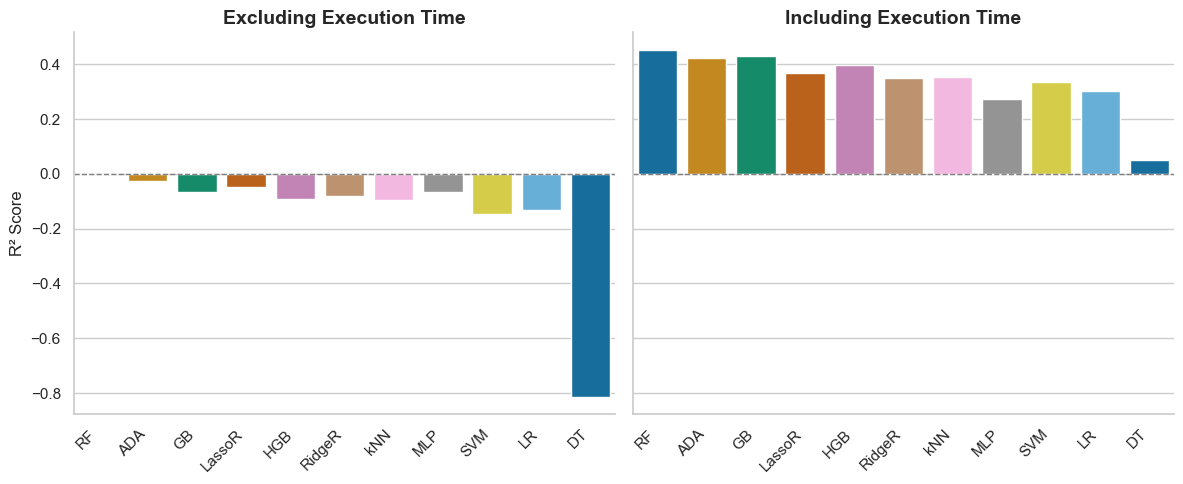

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")
palette = 'colorblind'

# Consistent model order based on average R²
model_order = (
    combined.groupby("model_name")["r2_mean"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Ensure correct group names are used
combined["Group"] = combined["Group"].replace({
    "without Execution Time": "Excluding Execution Time",
    "with Execution Time": "Including Execution Time"
})

# Plot with FacetGrid
g = sns.catplot(
    data=combined,
    kind="bar",
    x="model_name",
    y="r2_mean",
    col="Group",
    order=model_order,
    col_order=["Excluding Execution Time", "Including Execution Time"],
    sharey=True,
    palette=palette,
    height=5,
    aspect=1.2,
    # edgecolor="black"
)

# Style tweaks
g.set_titles("{col_name}", size=14, weight='bold')
g.set_axis_labels("", "R² Score")
g.set_xticklabels(rotation=45, ha='right', fontsize=11)
for ax in g.axes.flat:
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


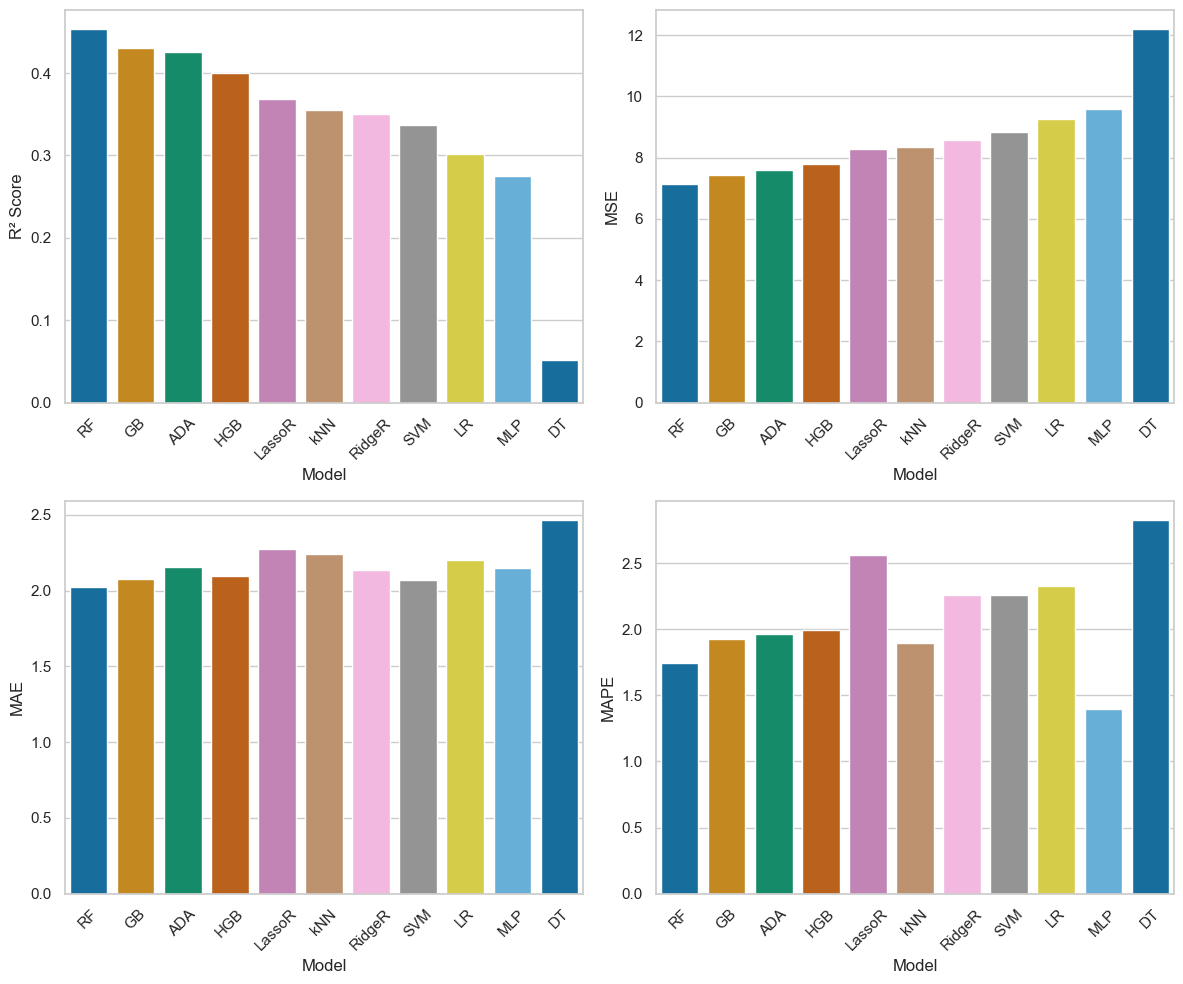

In [49]:
# Filter: all methods/features off
filtered_df = df[
    (df["lowVarianceDrop"] == False) &
    (df["dropExecTime"] == False) &
    (df["rfecv"] == False) &
    (df["kbest"] == False) &
    (df["autospearman"] == False) &
    (df["hyperparameters"] == False)
]

# Sort by R² descending
filtered_df = filtered_df.sort_values(by="r2_mean", ascending=False)

# Set seaborn style
sns.set(style="whitegrid")
palette = 'colorblind'

# Create 2×2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Metrics and labels
metrics = ["r2_mean", "mse_mean", "mae_mean", "mape_mean"]
y_labels = ["R² Score", "MSE", "MAE", "MAPE"]

# Plot each subplot
for ax, metric, y_label in zip(axes.flat, metrics, y_labels):
    sns.barplot(x="model_name", y=metric, data=filtered_df, palette=palette, ax=ax)
    ax.set_xlabel("Model")
    ax.set_ylabel(y_label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Save plot
# plt.savefig("plt_RQ3A-Grid_Regression.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()
